# Class 12: Initial Value Problems

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

Reference: Chapter 17 in McClarren.

## Class 12 Learning Objectives

After studying this notebook, completing the activties, and attending class, you should be able to:
* Explain the advantages and disadvantages of Forward Euler, Backward Euler, Crank-Nicolson, and Runge-Kutta
 * Error convergence rate
 * Stability (how does this relate to explicit versus implicit?)
 * Oscillations
 * Ease to implement, computational expense (how does this relate to explicit versus implicit?)
* Derive the stability and non-oscillatory properties (limits on $\Delta t$) for methods such as Forward Euler, Backward Euler, and Crank-Nicolson
* Integrate systems of differential equations in Python. Explore the stability and oscillatory properties.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import scipy.integrate as integrate

## 12a. Main Idea

Today, we will discuss techniques to compute approximate solutions to **initial value problems (IVP)**. Every IVP has two parts:
* System of differential equations
* Initial conditions that specify the numeric value for each different state at $t=0$.

Let's consider the generic, first-order initial value problem given by

$$ y'(t) = f(y,t), \qquad y(0) = y_0,$$

where $f(y,t)$ is a function that in general depends on $y$ and $t$.  Typically, we'll call $t$ the time variable and $y$ our solution.  For a problem of this sort we can simply integrate both sides of the equation from $t=0$ to $t=\Delta t$, where $\Delta t$ is called the time step.  Doing this we get

$$y(\Delta t) - y(0) = \int_{0}^{\Delta t} f(y,t)\,dt.$$

Today's class focuses on solving this problem. You'll notice a lot of similarities to last class, numeric integration, as integrals and differential equations are closely related.

## 12b. Forward (Explicit) Euler

### 12-i. Main Idea

Let's numerically approximating the above integral! One rule that is so basic that we didn't talk about it in the chapters on numerical integration is the left-hand rectangle rule.  Here we estimate the integral as

$$\int_{0}^{\Delta t} f(y,t)\,dt \approx \Delta t f(y(0), 0).$$

Graphically, this looks like

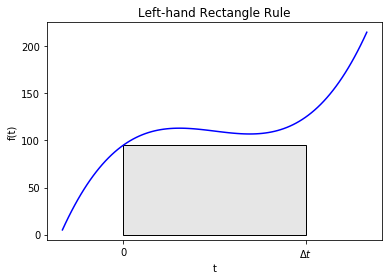

In [2]:
#graphical example
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2
b = 8
verts = [(a,0),(a,f(a)), (b,f(a)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Left-hand Rectangle Rule")
plt.show()

This figure demonstrates why the name left-hand rectangle rule is used: the area under the curve is estimated as a rectangle that touches the curve at the left endpoint of the integral bounds.

Putting this together gives us
$$y(\Delta t) = y(0) + \Delta t f(y(0), 0).$$

This will give an approximate value of the solution $\Delta t$ after the initial condition. If we wanted to continue out to later time we could apply the rule again repeatedly.  To do this we'll define the value of $y$ after $n$ timesteps, each of width $\Delta t$ as

$$y^{n} = y(t^n) = y(n\Delta t), \qquad \text{for } n=0,\dots, N.$$

Using this we can write the solution using the left-hand rectangle rule for integration as

$$y^{n+1} = y^n + \Delta t f(y^n, t^n).$$

This method is called the **explicit Euler method** or the **forward Euler method**. The method is said to be explicit because the update is defined by the value of the solution at time $t^n$.

### 12b-ii. Generalization and Python Implementation

Let's say we want to numerically approximate

$$ y'(t) = f(y,t), \qquad y(0) = y_0,$$

from time $t=0$ to $t=a$. But we want want to know more than just $y(t=a)$. We want to compute $y(t)$ at $N=10$ intermediate points along the way. In other words, we want to compute $y(t=0.1a$), $y(t=0.2a)$, etc.

How can we do this with the **explicit Euler method**? We could set $\Delta t = 0.1a$ and apply the formula

$$y^{n+1} = y^n + \Delta t f(y^n, t^n).$$

$N$ times for $n=1$ to $n=N$.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write psuedocode for a Python function with four inputs: a function to evaluate the right-hand side of the differential equation, i.e., $f(y,t)$, the initial condition $y_0$, the time step $\Delta t$, and the number of timesteps $N$. Your function should use the forward Euler method to estimate $y(t=\Delta t)$, $y(t=2 \Delta t)$, ..., $y(t=N \Delta t)$. Your function should return two numpy arrays: one for time $t$ and one for $y$. <b>This is excellent practice for the next exam.</b> Converting a list of instructions into pseudocode is a key skill we teach (and assess) in this class.
</div>

We now define a Python function that for a given right-hand side, initial condition, and time step and number of time steps, $N$, performs the forward Euler method. This function will take the name of the function on the right-hand side as an input.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Trade pseudocode with a partner. Compare your partner's pseudocode to the Python code below. Offer your partner one piece of constructive feedback.
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Complete the function <tt>forward_euler</tt> by filling in the missing line. Hint: The equation $y^{n+1}=$ ... in the reading is important.
</div>

In [3]:
def forward_euler(f,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    
    # convert to integer
    numsteps = int(numsteps)
    
    # initialize vectors to store solutions
    y = np.zeros(numsteps+1)
    
    # compute time
    t = np.arange(numsteps+1)*Delta_t
    
    # copy initial condition
    y[0] = y0
    
    # loop over timesteps
    for n in range(1,numsteps+1):
        
        # Compute y[n]. Hint: You only need to write a single line of Python code.
        ### BEGIN SOLUTION
        y[n] = y[n-1] + Delta_t * f(y[n-1], t[n-1])
        ### END SOLUTION
    return t, y

### 12b-iii. Test Problem

We created a function. Now let's test this on a simple problem:

$$y'(t) = -y(t), \qquad y_0 = 1.$$ The solution to this problem is 
$$y(t) = e^{-t}.$$

Let's compare the exact solution to the forward Euler solution with a time step of 0.1.

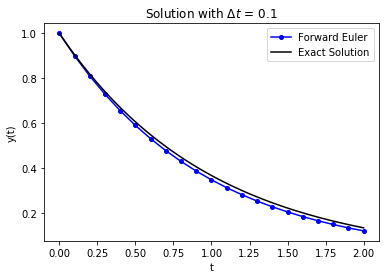

In [4]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 2.0
t,y = forward_euler(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Forward Euler",color="blue",marker="o",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

That looks pretty close. The numerical solution appears to be slightly below the exact solution, but the difference appears to be small.

Your function <tt>forward_euler</tt> works if it computes the following values for the test problem:

| t 	| y |
| - 	| - |
| 0.0 	| 1.00000 |
| 0.1 	| 0.90000 |
| 0.2 	| 0.81000 |
| 0.3 	| 0.72900 |
| 0.4 	| 0.65610 |
| 0.5 	| 0.59049 |
| 0.6 	| 0.53144 |
| 0.7 	| 0.47830 |
| 0.8 	| 0.43047 |
| 0.9 	| 0.38742 |
| 1.0 	| 0.34868 |
| 1.1 	| 0.31381 |
| 1.2 	| 0.28243 |
| 1.3 	| 0.25419 |
| 1.4 	| 0.22877 |
| 1.5 	| 0.20589 |
| 1.6 	| 0.18530 |
| 1.7 	| 0.16677 |
| 1.8 	| 0.15009 |
| 1.9 	| 0.13509 |
| 2.0 	| 0.12158 |

In [5]:
# Print the values for t and y in a nice table
print("| t \t| y |")
print("| - \t| - |")
for i in range(len(t)):
    print("| {0:.1f} \t| {1:0.5f} |".format(t[i],y[i]))

| t 	| y |
| - 	| - |
| 0.0 	| 1.00000 |
| 0.1 	| 0.90000 |
| 0.2 	| 0.81000 |
| 0.3 	| 0.72900 |
| 0.4 	| 0.65610 |
| 0.5 	| 0.59049 |
| 0.6 	| 0.53144 |
| 0.7 	| 0.47830 |
| 0.8 	| 0.43047 |
| 0.9 	| 0.38742 |
| 1.0 	| 0.34868 |
| 1.1 	| 0.31381 |
| 1.2 	| 0.28243 |
| 1.3 	| 0.25419 |
| 1.4 	| 0.22877 |
| 1.5 	| 0.20589 |
| 1.6 	| 0.18530 |
| 1.7 	| 0.16677 |
| 1.8 	| 0.15009 |
| 1.9 	| 0.13509 |
| 2.0 	| 0.12158 |


The autograder test below will take your functions, rerun the test case above, and check that these values match with a tolerance of $10^{-3}$.

In [6]:
### BEGIN HIDDEN TESTS
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 2.0
t,y = forward_euler(RHS,1.0,Delta_t,t_final/Delta_t)

t_ans = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 ,0.7 ,0.8 ,0.9 ,1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.]
y_ans = [1.0,0.9,0.81,0.7290000000000001,0.6561000000000001,0.5904900000000001,0.531441,0.4782969,0.43046721,
         0.387420489,0.3486784401,0.31381059609,0.282429536481,0.2541865828329,0.22876792454961,
         0.20589113209464902,0.1853020188851841,0.16677181699666568,0.15009463529699912,0.1350851717672992,
         0.12157665459056928]

assert len(t) == 21, "t from your function should be length 21"
assert len(y) == 21, "y from your function should be length 21"

for i in range(len(t_ans)):
    assert np.abs(t[i] - t_ans[i]) < 1E-3,"Check element "+str(i)+" of the t output vector"
    assert np.abs(y[i] - y_ans[i]) < 1E-3,"Check element "+str(i)+" of the y output vector"

### END HIDDEN TESTS

### 12b-iv. Impact of Step Size on Integration Error

We could re-do this with different size time steps and compare the solutions as a function of $\Delta t$.

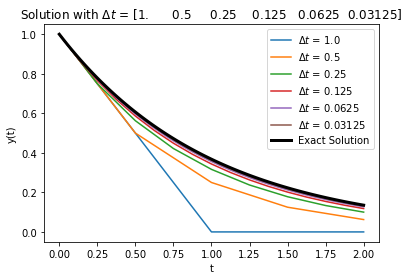

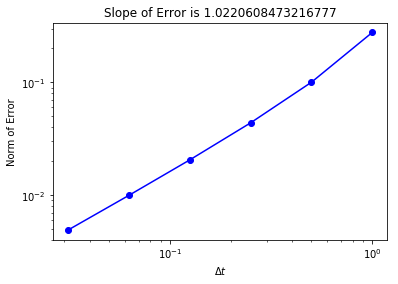

In [7]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = forward_euler(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="blue")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

Notice that the error indicates that this is a first-order method in $\Delta t$: when I decrease $\Delta t$ by a factor of 2, the error decreases by a factor of 2.  In this case we measured the error with a slightly different error norm:
$$\mathrm{Error} = \frac{1}{\sqrt{N}}\sqrt{\sum_{n=1}^{N} \left(y^n_\mathrm{approx} - y^n_\mathrm{exact}\right)^2},$$
where $N$ is the number of steps the ODE is solved over.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: For this test problem, why does the numeric solution always appear to underestimate the exact solution? Why is the approximation worse with larger $\Delta t$. Write 2 or 3 sentences below.
</div>

**Home Activity Answer**:

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Discuss your answer with a partner.
</div>

### 13b-v. First Look at Stability Issues

The code below plots the numeric approximation and exact solution for the test problem. Spend a minute trying a few different $\Delta t$ values.

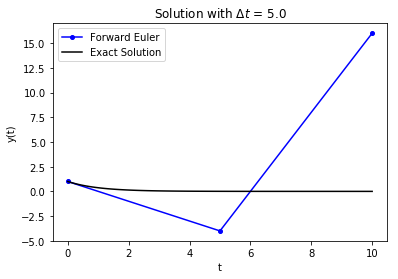

In [8]:
RHS = lambda y,t: -y

# change this
Delta_t = 5.0

t_final = 10
t,y = forward_euler(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Forward Euler",color="blue",marker="o",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Determine the largest possible $\Delta t$ value before the numeric solution explodes. At this <i>sweet spot</i>, the numeric solution will oscillate between two values. Store your answer in the Python float variable <tt>ans_bv1</tt>.
</div>

In [9]:
### BEGIN SOLUTION
ans_bv1 = 2.0
### END SOLUTION

In [10]:
### BEGIN HIDDEN TESTS
secret_ans = 2.0

assert np.abs(ans_bv1 - secret_ans) < 1E-3, "Not there yet."
### END HIDDEN TESTS

One thing that can happen with the forward Euler method is that if the time step is too large, it can go unstable. What this means is the solution diverges to be plus or minus infinity (sometimes it goes to both). In our case, forward Euler is unstable if $\Delta t > 2$.

The solution grows over time, even though the true solution decays to 0. This happens because the magnitude of the soution grows, which makes the right-hand side for the next update larger.  This makes the solution grow in magnitude each step.

**Stability** is an important consideration, and we will talk more about it later.

## 12c. Backward (Implicit) Euler

### 12c-i. Main Idea

We could use a different method to integrate our original ODE rather than the left-hand rectangle rule.  An obvious alternative is the right-hand rectangle rule:

$$y^{n+1} = y^n + \Delta t f(y^{n+1}, t^{n+1}).$$

This method is called the backward Euler method or the implicit Euler method.  Graphically, this method looks like:

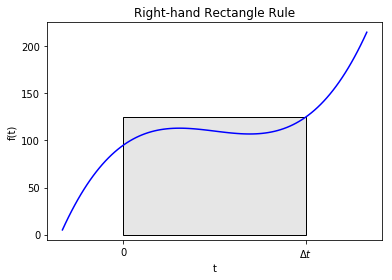

In [11]:
#graphical example
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2
b = 8
verts = [(a,0),(a,f(b)), (b,f(b)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Right-hand Rectangle Rule")
plt.show()

It is implicit because the update is implicitly defined by evaluating $f$ with the value of $y$ we're trying to solve for. That means the update needs to solve the equation

$$ y^{n+1} - y^{n} - \Delta t f(y^{n+1},t^{n+1}) = 0,$$

using a nonlinear solver (unless $f$ is linear in $y$).  Therefore, this method is a bit harder to implement, but still fairly simple.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Spend 5 minutes reviewing your notes from Class 9: Newton Methods.
</div>

The main algorithm to apply forward and backward Euler to a problem is essentially the same. With forward Euler, we could explicitly compute the next step $y^{n+1}$ with a simple formula. For backward Euler, we need to solve a system of equations.

### 12c-ii. Python Implementation

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Complete the function below. In the commented out spot, you'll need to solve a nonlinear equation to calculate $y^{n+1}$. Hints: You want to write two lines of code. The <b>first line</b> will use a lambda function to define the nonlinear equation to be solved. The <b>second line</b> will call <tt>inexact_newton</tt> to solve the system and store the answer in <tt>y[n]</tt>. <b>Read these instructions again carefully.</b>
</div>

In [12]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    while (np.fabs(f(x)) > epsilon):
        fx = f(x)
        fxdelta = f(x+delta)
        slope = (fxdelta - fx)/delta
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        iterations += 1
    if LOUD:
        print("It took",iterations,"iterations")
    return x #return estimate of root

def backward_euler(f,y0,Delta_t,numsteps,LOUD=False):
    """Perform numsteps of the backward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    y = np.zeros(numsteps+1)
    t = np.arange(numsteps+1)*Delta_t
    y[0] = y0
    for n in range(1,numsteps+1):
        if LOUD:
            print("\nt =",t[n])
            
        ### BEGIN SOLUTION
        solve_func = lambda u: u-y[n-1] - Delta_t*f(u,t[n])
        y[n] = inexact_newton(solve_func,y[n-1],LOUD=LOUD)
        ### END SOLUTION
        if LOUD:
            print("y =",y[n])
    return t, y

Now let's test our code using the simple problem from above.


t = 0.1
x0 = 1.0
x_ 1 = 1.0 - 0.1 / 1.1000000006700095 = 0.9090909091462818
It took 1 iterations
y = 0.9090909091462818

t = 0.2
x0 = 0.9090909091462818
x_ 1 = 0.9090909091462818 - 0.09090909091462818 / 1.0999999994210086 = 0.8264462809985739
It took 1 iterations
y = 0.8264462809985739

t = 0.30000000000000004
x0 = 0.8264462809985739
x_ 1 = 0.8264462809985739 - 0.0826446280998574 / 1.0999999994210086 = 0.7513148008682485
It took 1 iterations
y = 0.7513148008682485

t = 0.4
x0 = 0.7513148008682485
x_ 1 = 0.7513148008682485 - 0.07513148008682485 / 1.0999999994210086 = 0.6830134552988206
It took 1 iterations
y = 0.6830134552988206


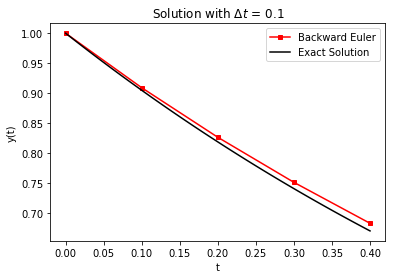

In [13]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = backward_euler(RHS,1,Delta_t,t_final/Delta_t,True)
plt.plot(t,y,'-',label="Backward Euler",color="red",marker="s",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkred;"> 
<b>Important</b>: Test your function with both <tt>LOUD=True</tt> and <tt>LOUD=False</tt> options. You should get the same answer.
</div>

Your function in the last home activity works if it computes the following values:

| t | y |
| - | - |
| 0.0 | 1.0 |
| 0.1 | 0.9090909091462818 |
| 0.2 | 0.8264462809985739 |
| 0.3 | 0.7513148008682485 |
| 0.4 | 0.6830134552988206 |

The autograder test below will take your functions, rerun the test case above, and check that these values match with a tolerance of $10^{-3}$.

In [14]:
### BEGIN HIDDEN TESTS
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = backward_euler(RHS,1.0,Delta_t,t_final/Delta_t,False)

t_ans = [0.0, 0.1, 0.2, 0.3, 0.4]
y_ans = [1.0, 0.9090909091462818, 0.8264462809985739, 0.7513148008682485, 0.6830134552988206]

assert len(t) == 5, "t from your function should be length 5"
assert len(y) == 5, "y from your function should be length 5"

for i in range(5):
    assert np.abs(t[i] - t_ans[i]) < 1E-3,"Check element "+str(i)+" of the t output vector"
    assert np.abs(y[i] - y_ans[i]) < 1E-3,"Check element "+str(i)+" of the y output vector"

### END HIDDEN TESTS

### 12c-iii. Impact of Step Size on Integration Error

Perhaps you've detected a pattern. After we implement and test a numerical method, we often want to know how the error rate changes with step size. As a first look, let's conduct a computational experiment with the same test problem.

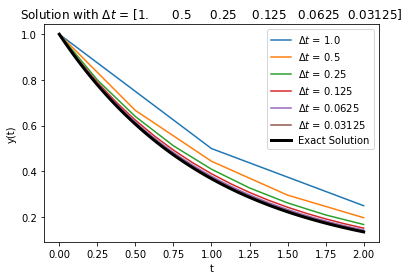

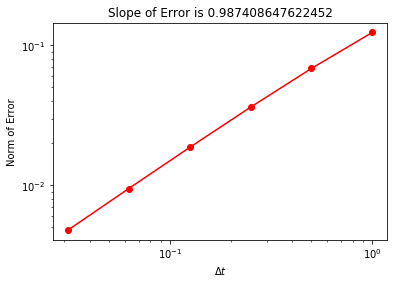

In [15]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = backward_euler(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="red")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

A couple of things to notice from the plots: the backward Euler method approaches the solution from above, and the convergence of the error is at the same rate as forward Euler.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: <i> Exam Practice Question </i> Above are two plots exploring how the step size impacts the error of the backwards Euler method for the test problem $\dot{y} = e^{-t},~y(0)=1.0$. Write a sentence to answer each of the following questions. 
</div>

**Home Activity Questions and Answers**
1. Why does this method always overapproximate the exact solution? Answer:
2. How does the error for this method scale with the step size $\Delta t$? Answer:

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your answer with a partner.
</div>

### 12c-iv. Second Look at Stability Issues

It may seem for our test problem that we did not get a lot of benefit from the extra effort of solving a nonlinear equation at each step. But let's look at stability before we completely disregard backward Euler methods.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Can you find a step size that causes the numeric solution to explode? Record the step size in the Python float <tt>ans_civ</tt>. If you cannot find a stepsize, store <tt>np.nan</tt> as the solution.
</div>

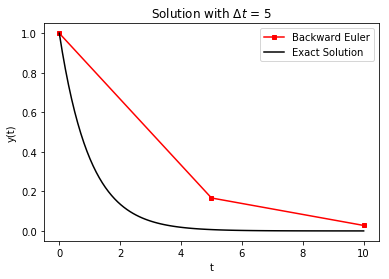

In [16]:
RHS = lambda y,t: -y
Delta_t = 5
t_final = 10
t,y = backward_euler(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Backward Euler",color="red",marker="s",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

In [17]:
### BEGIN SOLUTION
ans_civ = np.nan
### END SOLUTION

In [18]:
### BEGIN HIDDEN TESTS
assert ans_civ is np.nan, "Keep on reading in the notebook for more information."
### END HIDDEN TESTS

We will see later the Implicit Euler is **unconditionally stable**. The solution, though not very accurate, still behaves reasonably well. This can be very useful on more complicated problems than this simple one. We'll see an example of this soon.

# 12d. Crank-Nicolson (aka Trapezoid Rule)

### 12d-i. Main Idea

We could use the trapezoid rule to integrate the ODE over the timestep. Doing this gives

$$y^{n+1} = y^n + \frac{\Delta t}{2}\left( f(y^{n}, t^{n})+ f(y^{n+1}, t^{n+1})\right).$$

This method, often called Crank-Nicolson, is also an implicit method because $y^{n+1}$ is on the right-hand side of the equation. For this method the equation we have to solve at each time step is

$$y^{n+1} - y^n - \frac{\Delta t}{2}\left( f(y^{n}, t^{n})+ f(y^{n+1}, t^{n+1})\right) = 0.$$

Though we saw it before let's remind ourselves of the graphical representation of the trapezoid rule:

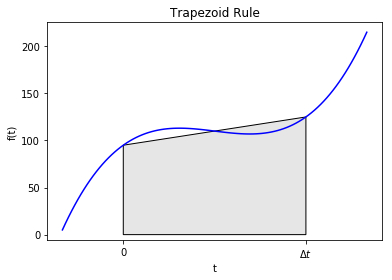

In [19]:
#graphical example
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2
b = 8
verts = [(a,0),(a,f(a)), (b,f(b)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Trapezoid Rule")
plt.show()

### 12d-ii. Python Implementation

Implementing this method is no more difficult than backward Euler.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Complete the function below. In the commented out spot, you'll need to solve a nonlinear equation to calculate $y^{n+1}$. Hints: You want to write two lines of code. The <b>first line</b> will use a lambda function to define the nonlinear equation to be solved. The <b>second line</b> will call <tt>inexact_newton</tt> to solve the system and store the answer in <tt>y[n]</tt>. <b>Read these instructions again carefully.</b>
</div>

In [20]:
def crank_nicolson(f,y0,Delta_t,numsteps, LOUD=False):
    """Perform numsteps of the backward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    y = np.zeros(numsteps+1)
    t = np.arange(numsteps+1)*Delta_t
    y[0] = y0
    for n in range(1,numsteps+1):
        if LOUD:
            print("\nt =",t[n])
            
        ### BEGIN SOLUTION
        # setup nonlinear system
        solve_func = lambda u: u-y[n-1] - 0.5*Delta_t*(f(u,t[n])
                                                       + f(y[n-1],t[n-1]))
        # solve nonlinear system
        y[n] = inexact_newton(solve_func,y[n-1])
        ### END SOLUTION
        
        if LOUD:
            print("y =",y[n])
    return t, y

Now let's test our code using the simple problem from above.


t = 0.1
y = 0.9047619048250637

t = 0.2
y = 0.8185941043087901

t = 0.30000000000000004
y = 0.7406327609899468

t = 0.4
y = 0.6700963075158828


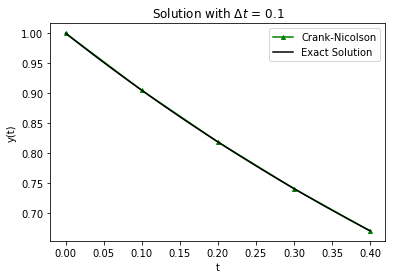

In [21]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = crank_nicolson(RHS,1,Delta_t,t_final/Delta_t,True)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

Your function in the last home activity works if it computes the following values:

| t | y |
| - | - |
| 0.0 | 1.0 |
| 0.1 | 0.9047619048250637 |
| 0.2 | 0.8185941043087901 |
| 0.3 | 0.7406327609899468 |
| 0.4 | 0.6700963075158828 |

The autograder test below will take your functions, rerun the test case above, and check that these values match with a tolerance of $10^{-3}$.

In [22]:
### BEGIN HIDDEN TESTS
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = crank_nicolson(RHS,1.0,Delta_t,t_final/Delta_t,False)

t_ans = [0.0, 0.1, 0.2, 0.3, 0.4]
y_ans = [1.0, 0.9047619048250637, 0.8185941043087901, 0.7406327609899468, 0.6700963075158828]

assert len(t) == 5, "t from your function should be length 5"
assert len(y) == 5, "y from your function should be length 5"

for i in range(5):
    assert np.abs(t[i] - t_ans[i]) < 1E-3,"Check element "+str(i)+" of the t output vector"
    assert np.abs(y[i] - y_ans[i]) < 1E-3,"Check element "+str(i)+" of the y output vector"

### END HIDDEN TESTS

### 12d-iii. Impact of Step Size on Integration Error

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below.
</div>

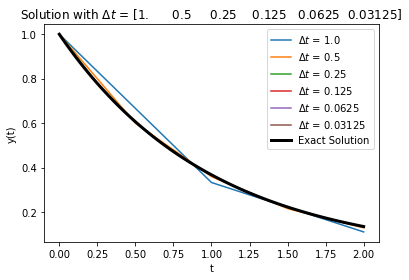

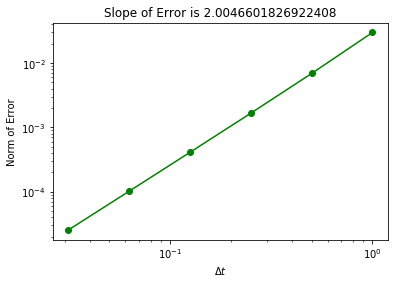

In [23]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = crank_nicolson(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="green")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

Now we get **second-order convergence of the error** as evidenced by the error plot.

### 12d-iv. Stability and Oscillations

Let's return to our trusty test problem to explore stability and oscillations with Crank-Nicolson.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Adjust the step size to answer the following questions.
</div>

**Home Activity Questions:**
* At what step size (if any) does Crank-Nicolson become unstable? Why?
* At what step size (if any) does Crank-Nicolson begin to oscillate? Why?

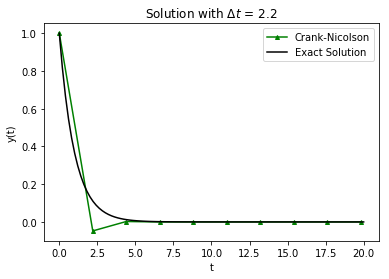

In [24]:
RHS = lambda y,t: -y

# adjust this
Delta_t = 2.2

# compute approximate solution with Crack-Nicolson, plot
t_final = 20
t,y = crank_nicolson(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

In terms of stability, Crank-Nicolson is a mixed bag: it's **stable but can oscillate**.

Notice that the oscillation makes the numerical solution negative. This is the case even though the exact solution, $e^{-t}$, cannot be negative. 

## 13e. Comparison of the methods on a more complicated problem

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below after completing the <tt>crank_nicolson</tt> function.
</div>

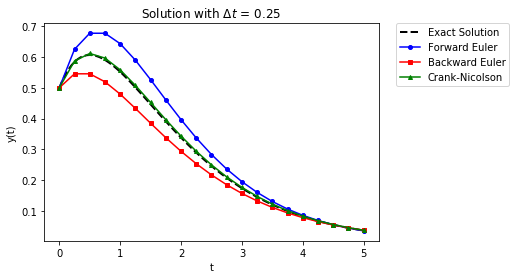

In [25]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
y0 = exact_sol(0)
Delta_t = 0.25
t_final = 5

# exact solution
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,color="black",linestyle="--")

t,y = forward_euler(RHS,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Forward Euler",color="blue",marker="o",markersize=4)

t,y = backward_euler(RHS,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Backward Euler",color="red",marker="s",markersize=4)

t,y = crank_nicolson(RHS,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

The two Euler methods are equally inaccurate, they just differ in how they are wrong (above or below). Crank-Nicolson does a good job of following the solution.

Now let's have a bigger time step.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below after completing the <tt>crank_nicolson</tt> function.
</div>

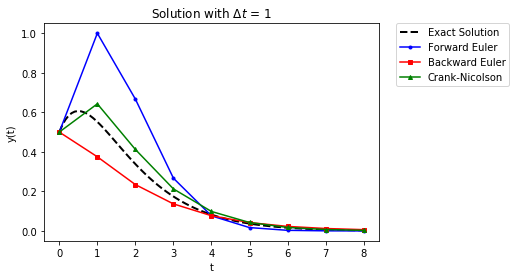

In [26]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
y0 = exact_sol(0)
Delta_t = 1
t_final = 8

# exact solution
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,color="black",linestyle="--")

t,y = forward_euler(RHS,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Forward Euler",color="blue",marker=".")

t,y = backward_euler(RHS,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Backward Euler",color="red",marker="s",markersize=4)

t,y = crank_nicolson(RHS,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

In these results we see that for a large time step, forward Euler completely overshoots the initial growth, backward Euler just starts decaying, and Crank-Nicolson starts off too high before beginning to decay. It appears that even Crank-Nicolson is not accurate enough for this problem.

## 13f. Stability

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Read this section and write down any questions you have.
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Walk through the stability analysis together.
</div>

There is a formal definition of stability for a numerical method for integrating ODEs.  To get to this definition, consider the ODE
$$y'(t) = -\alpha y(t),$$ for any single-step method we can write 
$$y^{n+1} = g y^n.$$ A solution is said to be stable if $|g| \leq 1.$ Furthermore, a solution is said to be non-oscillatory if $0 \leq g \leq 1.$ The quantity $g$ is often called the growth rate. In **Process Controls** you will refer to $g$ as the eigenvalues of the discrete-time system.

### 12f-i. Forward (Explicit) Euler

Let's look at forward Euler on this ODE:
$$y^{n+1} = y^n - \alpha \Delta t y^n = (1-\alpha \Delta t)y^n,$$
this implies $$g_\mathrm{FE} = 1-\alpha \Delta t.$$ To make sure that $|g| \leq 1$ we need to have $\alpha \Delta t \leq 2$. To be non-oscillatory we need $\alpha \Delta t \leq 1$. This is why when we solved $$ y'(t) = -y(t)$$ with $\Delta t = 2.5$, the solution grew in an unstable manner. Because there is a restriction on the timestep for stability, we call the forward Euler method conditionally stable.

### 12f-ii. Backward (Implicit) Euler

The value of the growth rate for backward Euler can be easily derived.  We start with

$$y^{n+1} = y^n - \alpha \Delta t y^{n+1},$$ which when rearranged is

$$y^{n+1} = \frac{y^n}{1 + \alpha \Delta t}.$$  This makes 

$$g_\mathrm{BE} = \frac{1}{1 + \alpha \Delta t}.$$ 

For any $\Delta t >0,$ $g$ will be between $0$ and $1$. Therefore, backward Euler is unconditionally stable and unconditionally non-oscillatory.

### 12f-iii. Crank-Nicolson (Trapezoid) Method

The Crank-Nicolson method has
$$g_\mathrm{CN} = \frac{2-\alpha\Delta t}{2+\alpha\Delta t}.$$

This method will be unconditionally stable because

$$\lim_{\Delta t \rightarrow \infty} g_\mathrm{CN} = -1.$$

It is conditionally non-oscillatory because $g_\mathrm{CN} < 0$ for $\alpha \Delta t > 2.$ In the original example, we had $\alpha\Delta t  = 4$ and we saw noticeable oscillations. Oscillations occur when we increase step size.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Run the code below.
</div>

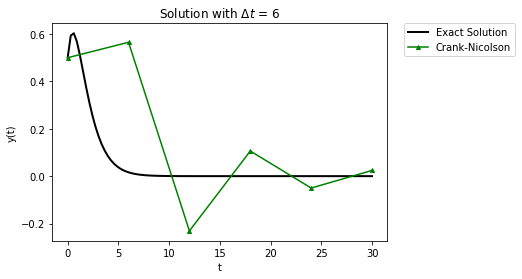

In [27]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
Delta_t = 6
t_final = 30
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,color="black")
t,y = crank_nicolson(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

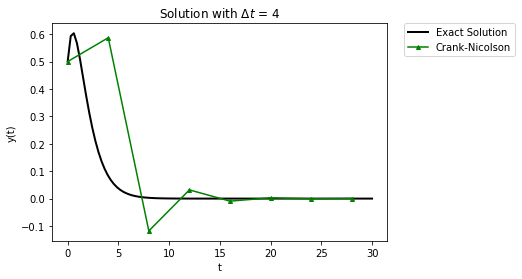

In [28]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
Delta_t = 4
t_final = 30
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,color="black")
t,y = crank_nicolson(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

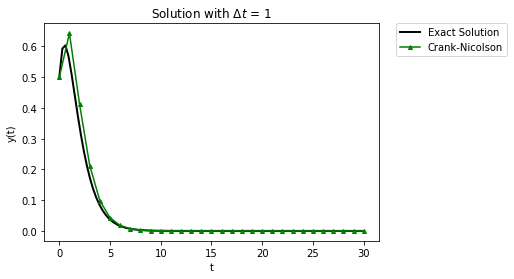

In [29]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
Delta_t = 1
t_final = 30
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,color="black")
t,y = crank_nicolson(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

## 12g. Fourth-order (Explicit) Runge-Kutta Method

There is one more method that we need to consider at this point.  It is an explicit method called a Runge-Kutta method.  The particular one we will learn is fourth-order accurate in $\Delta t$.  That means that if we decrease $\Delta t$ by a factor of 2, the error will decrease by a factor of $2^4=16$. The method can be written as
$$y^{n+1} = y^n + \frac{1}{6}\left(\Delta y_1 + 2 \Delta y_2 + 2 \Delta y_3 + \Delta y_4\right),$$
where
$$\Delta y_1 = \Delta t f(y^n, t^n),$$ $$\Delta y_2 = \Delta t f\left(y^n + \frac{\Delta y_1}{2},t^n + \frac{\Delta t}{2}\right),$$
$$\Delta y_3 =  \Delta t f\left(y^n + \frac{\Delta y_2}{2},t^n + \frac{\Delta t}{2}\right),$$
$$\Delta y_4 =  \Delta t f\left(y^n + \Delta y_3,t^n + \Delta t\right).$$
To get fourth-order accuracy, this method takes a different approach to integrating the right-hand side of the ODE.  Basically it makes several projections forward and combines them in such a way that the errors below $\Delta t^4$ cancel out.

Additional details with a nice illustration: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

Implementing this method is not difficult either.


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Discuss the code below with a partner. Be prepared to share one question or observation with the class after 3 minutes.
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Complete the function below. Hint: You should write two lines of Python code. The first line should calculate <tt>dy3</tt> and the second line should calculate <tt>dy4</tt>.
</div>

In [30]:
def RK4(f,y0,Delta_t,numsteps):
    """Perform numsteps of the 4th order Runge-Kutta method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    y = np.zeros(numsteps+1)
    t = np.arange(numsteps+1)*Delta_t
    y[0] = y0
    for n in range(1,numsteps+1):
        dy1 = Delta_t * f(y[n-1], t[n-1])
        dy2 = Delta_t * f(y[n-1] + 0.5*dy1, t[n-1] + 0.5*Delta_t)
        ### BEGIN SOLUTION
        dy3 = Delta_t * f(y[n-1] + 0.5*dy2, t[n-1] + 0.5*Delta_t)
        dy4 = Delta_t * f(y[n-1] + dy3, t[n-1] + Delta_t)
        ### END SOLUTION
        y[n] = y[n-1] + 1.0/6.0*(dy1 + 2.0*dy2 + 2.0*dy3 + dy4)
    return t, y

We'll test this on our problem with a simple exponential solution.

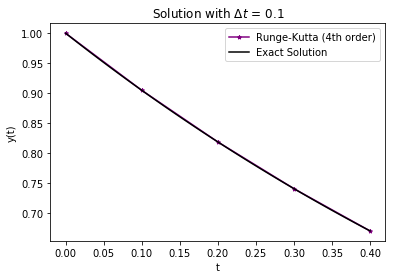

In [31]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = RK4(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Runge-Kutta (4th order)",color="purple",marker="*",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

Your function in the last home activity works if it computes the following values:

| t | y |
| - | - |
| 0.0 | 1.0 |
| 0.1 | 0.9048375 |
| 0.2 | 0.8187309 |
| 0.3 | 0.74081842 |
| 0.4 | 0.67032029 |

The autograder test below will take your functions, rerun the test case above, and check that these values match with a tolerance of $10^{-3}$.

In [32]:
### BEGIN HIDDEN TESTS
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = RK4(RHS,1.0,Delta_t,t_final/Delta_t)

t_ans = [0.0, 0.1, 0.2, 0.3, 0.4]
y_ans = [1.0, 0.9048375, 0.8187309, 0.74081842, 0.67032029]

assert len(t) == 5, "t from your function should be length 5"
assert len(y) == 5, "y from your function should be length 5"

for i in range(5):
    assert np.abs(t[i] - t_ans[i]) < 1E-3,"Check element "+str(i)+" of the t output vector"
    assert np.abs(y[i] - y_ans[i]) < 1E-3,"Check element "+str(i)+" of the y output vector"

### END HIDDEN TESTS

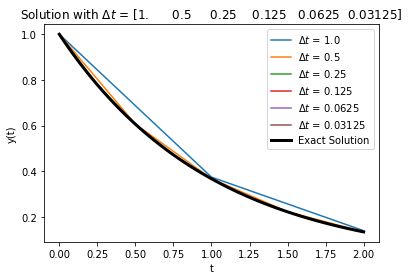

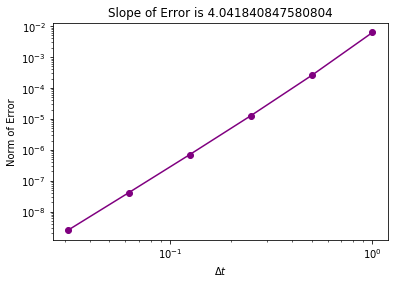

In [33]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = RK4(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="purple")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

Yes, we do indeed get 4th order convergence, as the name **fourth-order Runge-Kutta** suggests.

We can also try this on our more complicated problem.

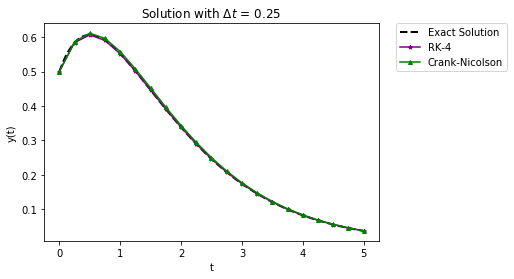

In [34]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
Delta_t = 0.25
t_final = 5
t_fine = np.linspace(0,t_final,100)

plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,linestyle="--",color="black")

t,y = RK4(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'.-',label="RK-4",color="purple",marker="*",markersize=4)

t,y = crank_nicolson(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

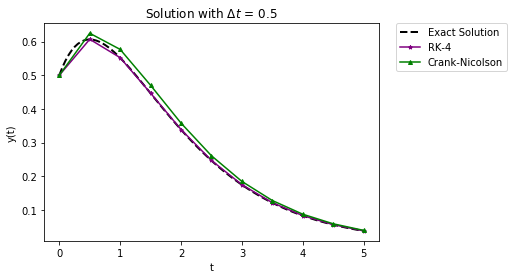

In [35]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
Delta_t = 0.5
t_final = 5
t_fine = np.linspace(0,t_final,100)

plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,linestyle="--",color="black")

t,y = RK4(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'.-',label="RK-4",color="purple",marker="*",markersize=4)

t,y = crank_nicolson(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'s-',label="Crank-Nicolson",color="green",marker="^",markersize=4)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

It also seems to do better that Crank-Nicolson with a large time step, but since it is an explicit method, there are limits: with a large enough time step the solution will oscillate and can be unstable.

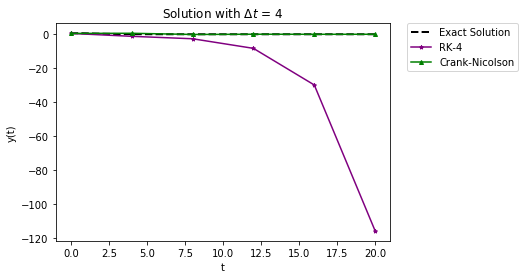

In [36]:
RHS = lambda y,t: (1/(t+0.5)-1)*y
exact_sol = lambda t: (t+0.5)*np.exp(-t)
Delta_t = 4
t_final = 20
t_fine = np.linspace(0,t_final,100)

plt.plot(t_fine,exact_sol(t_fine),label="Exact Solution",
         linewidth = 2,linestyle="--",color="black")

t,y = RK4(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="RK-4",color="purple",marker="*",markersize=4)

t,y = crank_nicolson(RHS,0.5,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Crank-Nicolson",color="green",marker="^",markersize=4)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Discuss with a partner: Why should you use RK4? When should you use Crank-Nicolson?
</div>

## 12h. Systems of Differential Equations

Often we will be concerned with solving a system of ODEs rather than a single ODE.  The explicit methods translate to this scenario directly. However, we will restrict ourselves to systems that can be written in the form
$$ \mathbf{y}'(t) = \mathbf{A}(t) \mathbf{y} + \mathbf{c}(t), \qquad \mathbf{y}(0) = \mathbf{y}_0.$$

In this equation $\mathbf{A}(t)$ is a matrix that can change over time, and $\mathbf{c}(t)$ is a function of $t$ only. For systems of this type our methods are written as follows:

<b>Forward Euler</b>
$$ \mathbf{y}^{n+1} = \mathbf{y}^{n} + \Delta t \mathbf{A}(t^n) \mathbf{y}^n + \Delta t\mathbf{c}(t^n)$$

<b>Backward Euler</b>
$$ \mathbf{y}^{n+1} = \mathbf{y}^{n} + \Delta t \mathbf{A}(t^{n+1}) \mathbf{y}^{n+1} + \Delta t\mathbf{c}(t^{n+1}),$$
which rearranges to
$$\left( \mathbf{I} - \Delta t \mathbf{A}(t^{n+1})\right)\mathbf{y}^{n+1} = \mathbf{y}^{n} + \Delta t\mathbf{c}(t^{n+1}).$$ Therefore, for backward Euler we will have to solve a linear system of equations at each time step.


<b>Crank-Nicolson</b>
$$\left( \mathbf{I} - \frac{\Delta t}{2} \mathbf{A}(t^{n+1})\right)\mathbf{y}^{n+1} = \left( \mathbf{I} + \frac{\Delta t}{2} \mathbf{A}(t^{n})\right)\mathbf{y}^{n} + \frac{\Delta t}{2}\left(\mathbf{c}(t^{n+1}) + \mathbf{c}(t^{n})\right).$$
This will also involve a linear solve at each step.

<b>Fourth-order Runge-Kutta</b>
$$\mathbf{y}^{n+1} = \mathbf{y}^n + \frac{1}{6}\left(\Delta \mathbf{y}_1 + 2 \Delta \mathbf{y}_2 + 2 \Delta \mathbf{y}_3 + \Delta \mathbf{y}_4\right),$$
$$\Delta y_1 = \Delta t \mathbf{A}(t^n)y^n + \mathbf{c}(t^n),$$ 
$$\Delta y_2 = \Delta t \mathbf{A}\left(t^n+ \frac{\Delta t}{2}\right)\left(y^n + \frac{\Delta y_1}{2}\right) + \Delta t\mathbf{c}(t^n + \frac{\Delta t}{2}),$$
$$\Delta y_3 =  \Delta t \mathbf{A}\left(t^n+ \frac{\Delta t}{2}\right)\left(y^n + \frac{\Delta y_2}{2}\right) + \Delta t\mathbf{c}(t^n + \frac{\Delta t}{2}),$$
$$\Delta y_4 =  \Delta t \mathbf{A}\left(t^n+ {\Delta t}\right)\left(y^n + {\Delta y_3}\right) + \Delta t\mathbf{c}(t^n + \Delta t).$$
</ul>

As noted above, the implicit methods require the solution of the linear system at each timestep, while the explicit methods do not.

We can define these ODE solvers for systems now.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Fill in the missing comments below. This is excellent exam practice.
</div>

In [37]:
def forward_euler_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    # 
    numsteps = int(numsteps)
    unknowns = y0.size
    
    # 
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    
    # 
    y[0:unknowns,0] = y0
    
    #
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        
        #
        A = Afunc(t[n-1])
        
        #
        y[0:unknowns,n] = yold + Delta_t * (np.dot(A,yold) + c(t[n-1]))
    return t, y

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your comments with a partner.
</div>

As a test of our method we will solve the ODE:

$$y''(t) = -y(t),\qquad y(0) = 1,\quad y'(0) = 0.$$

Wait, that's not a system, and we haven't covered how to do ODEs of with derivatives other than first derivatives. We can write this as a system using the definition 

$$u(t) = y'(t),$$ to get
$$\frac{d}{dt}\begin{pmatrix} u\\y\end{pmatrix} = \begin{pmatrix} 0 & -1\\ 1 & 0\end{pmatrix}\begin{pmatrix} u\\y\end{pmatrix} .$$

### 12h-i. Forward (Explicit) Euler

We'll set this up in python and solve it with forward Euler.  The solution, by the way, is $y(t) = \cos(t).$

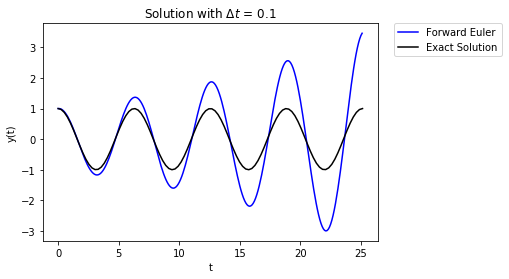

In [38]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = forward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Forward Euler",color="blue")
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Yikes, the error grows over time.  What's happening here is that the numerical error builds over time and this causes the magnitude to grow over time. Using a smaller value of $\Delta t$ can help, but not totally remove the problem.

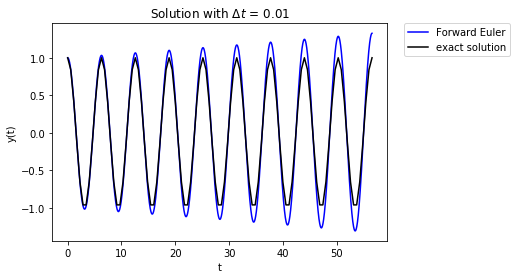

In [39]:
#Set up A function
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.01
t_final = 18*np.pi
t,y = forward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Forward Euler",color="blue")
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.cos(t_fine),label="exact solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We have really just delayed the inevitable.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Why is this behavior not surprising given what we know about the stability of forward Euler? Discuss with a partner for 30 seconds.
</div>

### 12h-ii. Backward (Explicit) Euler

Let's implement backward Euler now; we'll need a linear solver this time (because A is constant).

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Fill in the missing comments below. This is excellent exam practice.
</div>

In [40]:
def backward_euler_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    #
    numsteps = int(numsteps)
    unknowns = y0.size
    
    #
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    
    #
    y[0:unknowns,0] = y0
    
    #
    for n in range(1,numsteps+1):
        
        #
        yold = y[0:unknowns,n-1]
        
        #
        A = Afunc(t[n])
        
        #
        LHS = np.identity(unknowns) - Delta_t * A
        RHS = yold + c(t[n])*Delta_t
        
        # solving linear system of equations
        y[0:unknowns,n] = np.linalg.solve(LHS,RHS)
    return t, y

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your comments with a partner.
</div>

Results with $\Delta t = 0.1$ show that error builds over time.

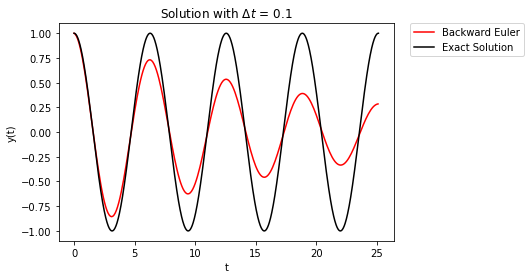

In [41]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = backward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Backward Euler",color="red")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now the numerical error builds over time, but the error causes the solution to damp out over time.  As before, decreasing $\Delta t$ only delays the onset of the error.

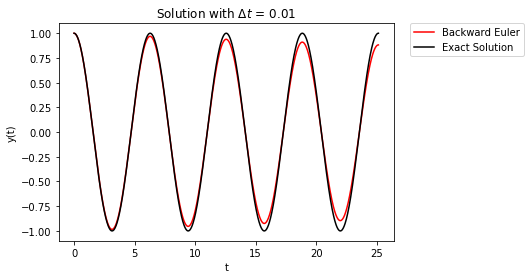

In [42]:
#Set up A function
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.01
t_final = 8*np.pi
t,y = backward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Backward Euler",color="red")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The takeaway here is that first-order accurate methods have errors that build over time. Forward Euler errors cause the solution to grow, whereas, Backward Euler has the solution damp to zero over time.

### 12h-iii. Crack-Nicolson

Now we'll look at Crank-Nicolson to see how it behaves.

In [43]:
def cn_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    y[0:unknowns,0] = y0
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        A = Afunc(t[n])
        LHS = np.identity(unknowns) - 0.5*Delta_t * A
        A = Afunc(t[n-1])
        RHS = yold + 0.5*Delta_t * np.dot(A,yold) + 0.5*(c(t[n-1]) + c(t[n]))*Delta_t
        y[0:unknowns,n] = np.linalg.solve(LHS,RHS)
    return t, y

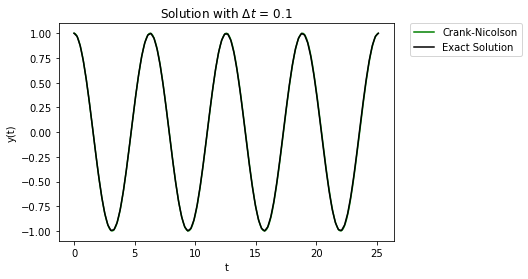

In [44]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = cn_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Crank-Nicolson",color="green")
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ahh, that's much better.  The error build up is not nearly as large of a problem.  Even if we look at the solution over a much longer time, the error does not affect solution too much:

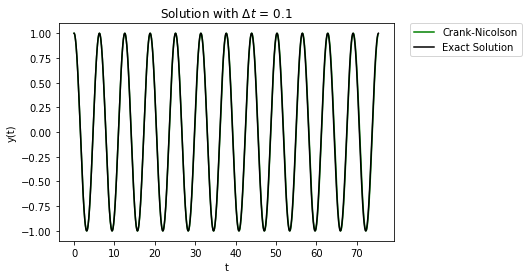

In [45]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 24*np.pi
t,y = cn_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Crank-Nicolson",color="green")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 13h-iv. Runge-Kutta

Finally, let's look at fourth-order Runge-Kutta.

In [46]:
def RK4_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    y[0:unknowns,0] = y0
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        A = Afunc(t[n-1])
        dy1 = Delta_t * (np.dot(A,yold) + c(t[n-1])) 
        A = Afunc(t[n-1] + 0.5*Delta_t)
        dy2 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + 0.5*dy1) 
                         + c(t[n-1] + 0.5*Delta_t))
        dy3 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + 0.5*dy2) 
                         + c(t[n-1] + 0.5*Delta_t))
        A = Afunc(t[n] + Delta_t)
        dy4 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + dy3) + c(t[n]))
        y[0:unknowns,n] = y[0:unknowns,n-1] + 1.0/6.0*(dy1 + 2.0*dy2 + 2.0*dy3 + dy4)
    return t, y

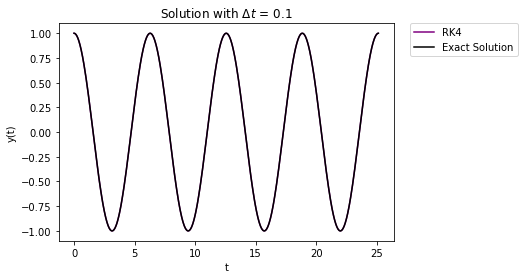

In [47]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = RK4_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="RK4",color="purple")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 12i. Scipy

In this notebook, we implemented forward Euler, backward Euler, Crank-Nicolson, and Runge-Kutta methods for a few reasons.

First, I wanted to show you how each method builds on several concepts we already learning this semester. I personally find it very satisfying when I have the "ah ha!" moment of clarity and see how concepts connect. My goal is to help facilitate everyone in the class haveing their "ah ha" moment.

Second, by seeing the guts of each method, we can better appreciate their strengths and limitations. You can hopefully imagine yourself in a future semester attempting to numerically integrate differential equations for reaction kinetics, but becoming frustrated late at night as a concentration always approaches infinity. While a model mistake is always a possibility, this behavior is not surprising if you are using an explicit method.

Nevertheless, the Scipy package implements all of the methods we discussed this class session. We should take a few minutes to learn how to use them.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Take a few minutes to review the documentation.
</div>

https://docs.scipy.org/doc/scipy/reference/integrate.html

We see that Scipy supports several integration methods.

| Method Name | Description |
| - | - |
| RK23 | Explicit Runge-Kutta method of order 3(2) | 
| RK45 | Explicit Runge-Kutta method of order 5(4) |
| Radau | Implicit Runge-Kutta method of Radau IIA family of order 5 |
| BDF | Implicit method based on backward-differentiation formulas |
| LSODA | Adams/BDF method with automatic stiffness detection and switching |

Let's revisit our multivariate test problem.

$$\frac{d \mathbf{y}}{dt} = \begin{pmatrix} 0 & -1\\ 1 & 0\end{pmatrix}\mathbf{y}$$

$$
\mathbf{y}(t=0) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$



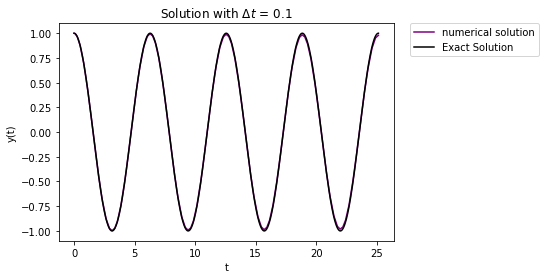

Number of RHS function evaluations: 392
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


In [48]:
# define time range
tspan = [0,t_final]
# tspan = np.arange(0,t_final,Delta_t)

# define function f(t,y)
f_new = lambda t,y: np.array([(0,-1),(1,0)]) @ y

# specify initial condition
y0 = np.array([0,1])

# integration results are stored in 'results' object
results = integrate.solve_ivp(f_new, tspan, y0, method="RK23")

# make plot
plt.plot(results.t,results.y[1,:],'-',label="numerical solution",color="purple")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# some solver statistics
print("Number of RHS function evaluations:",results.nfev)
print("Number of Jacobian evaluations:",results.njev)
print("Number of LU decompositions:",results.nlu)

We just need to adjust <tt>method="RK23"</tt> to switch between methods.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: In the code above, compare <tt>method="RK23"</tt> and <tt>method="RK45"</tt>. Look at the plots. In 1 sentence, speculate as to why RK45 requires fewer steps to integrate this problem for a given tolerance.
</div>

**Record Answer Here:**

Below is code that tries all of the methods listed in the table above.

In [49]:
methods = ["RK23", "RK45", "Radau", "BDF", "LSODA"]

for i in methods:

    print("Using method",i)
    
    # integration results are stored in 'results' object
    results = integrate.solve_ivp(f_new, tspan, y0, method=i)

    # some solver statistics
    print("Number of RHS function evaluations:",results.nfev)
    print("Number of Jacobian evaluations:",results.njev)
    print("Number of LU decompositions:",results.nlu)
    
    print("\n")

Using method RK23
Number of RHS function evaluations: 392
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


Using method RK45
Number of RHS function evaluations: 176
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


Using method Radau
Number of RHS function evaluations: 337
Number of Jacobian evaluations: 2
Number of LU decompositions: 10


Using method BDF
Number of RHS function evaluations: 228
Number of Jacobian evaluations: 1
Number of LU decompositions: 20


Using method LSODA
Number of RHS function evaluations: 328
Number of Jacobian evaluations: 0
Number of LU decompositions: 0




<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: Based on only the output above, which methods are explicit and which methods are implicit? Why?
</div>

## 12j. Reaction Rates Example

Consider two chemical reactions that convert molecule $A$ to desired product $B$ and a less valuable side-product $C$.

$A \overset{k_1}{\rightarrow} B \overset{k_2}{\rightarrow} C$

Our ultimate goal is to design a batch reactor that maximizes the production of $B$. This general sequential reactions problem is widely applicable in industry (especially chemicals, petrochemicals, pharmaceuticals, etc.).

The rate laws for these two chemical reactions are:

$r_A = -k_1 C_A$

$r_B = k_1 C_A - k_2 C_B$

$r_C = k_2 C_B$

$k_1$ and $k_2$ are reaction rate constants. These often depend on temperature, which we will ignore for now.

The concentrations in a batch reactor evolve with time per the following differential equations:

$$ \frac{d C_A}{dt} = r_A = -k_1 C_A $$

$$ \frac{d C_B}{dt} = r_B = k_1 C_A - k_2 C_B $$

$$ \frac{d C_C}{dt} = r_C = k_2 C_B $$

This is a linear system of differential equations. Assuming the feed is only species $A$, i.e., 

$$C_A(t=0) = C_{A0} \quad C_B(t=0) = 0 \quad C_C(t=0) = 0$$

leads to the following analytic solution:

$$C_A(t) = C_{A,0} \exp(-k_1 t)$$

$$C_B(t) = \frac{k_1}{k_2 - k_1} C_{A,0} \left[\exp(-k_1 t) - \exp(-k_2 t) \right]$$

$$C_C(t) = C_{A,0} - \frac{k_2}{k_2 - k_1} C_{A,0} \exp(-k_1 t) + \frac{k_1}{k_2 - k_1} \exp(-k_2 t) C_{A,0} = C_{A,0} - C_{A}(t) - C_{B}(t)$$

Below is Python code that plots these concentrations.

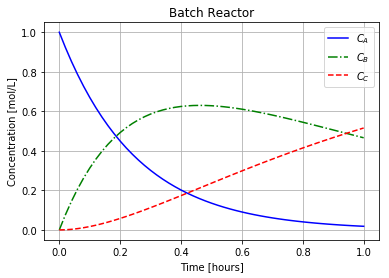

In [50]:
CA0 = 1 # Moles/L
k = [4, 1] # 1/hr

def exact_concentrations(t):
    ''' Exact solution for concentration profiles
    
    Arguments:
        t - time in hours (numpy array, length n)
        
    Returns:
        C: concentration of species A, B, and C in moles/L (3 x n numpy array)
    
    Important:
        This function assumes CA0 and k are defined in the global scope.
    
    '''

    CA = CA0 * np.exp(-k[0]*t);
    CB = k[0]*CA0/(k[1]-k[0]) * (np.exp(-k[0]*t) - np.exp(-k[1]*t));
    CC = CA0 - CA - CB;
    
    return np.vstack((CA, CB, CC))

def plot_concentrations(t,C):
    ''' Plot concentrations
    
    Arugments:
        C - matrix (3 x n numpy array) of concentrations
    
    '''
    
    
    
    plt.plot(t, C[0,:], label="$C_{A}$",linestyle="-",color="blue")
    plt.plot(t, C[1,:], label="$C_{B}$",linestyle="-.",color="green")
    plt.plot(t, C[2,:], label="$C_{C}$",linestyle="--",color="red")
    plt.xlabel("Time [hours]")
    plt.ylabel("Concentration [mol/L]")
    plt.title("Batch Reactor")
    plt.legend()
    plt.grid(True)
    plt.show()

t = np.linspace(0,1,51)
C = exact_concentrations(t)
plot_concentrations(t,C)

But let's say you did not know the analytic solution. We will now explore how to numerically approximate the solution.

### 12j-i. Linear Differential Equation System

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, write the batch reactor differential equations as a linear system.
</div>

Let $\mathbf{y}(t) = [C_A(t), C_B(t), C_C(t)]$. Write the differential equations in the form:

$$ \mathbf{y}'(t) = \mathbf{A}(t) \mathbf{y} + \mathbf{c}(t), \qquad \mathbf{y}(0) = \mathbf{y}_0.$$

What is $\mathbf{A}$, $\mathbf{c}(t)$, and $\mathbf{y}_0$?

### 12j-ii. Linear Differential Equation System

We now need to define a Python function to compute the right-hand side (RHS) of the differential equation.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, fill in the following functions. Define <tt>c0</tt>.
</div>

In [51]:
def A_rxn(t):
    ''' Matrix A for linear differential equations of reaction system
    
    Arguments:
        t: time (scalar)
        
    Returns:
        A: matrix (3 x 3)
    
    '''
    ### BEGIN SOLUTION
    return np.array([[-k[0], 0, 0], [k[0], -k[1], 0], [0, k[1], 0]])
    ### END SOLUTION
    
def c_rxn(t):
    ''' Forcing function for reaction system differential equation
    
    Arguments:
        t: time (scalar)
        
    Returns:
        c: vector (3 x 1)
    
    '''
    ### BEGIN SOLUTION
    return np.zeros(3)
    ### END SOLUTION

#c0 = 
### BEGIN SOLUTION
c0 = np.array([CA0, 0.0, 0.0])
### END SOLUTION
    
print("A =\n",A_rxn(0.0))

print("\nc =\n",c_rxn(0.0))

A =
 [[-4  0  0]
 [ 4 -1  0]
 [ 0  1  0]]

c =
 [0. 0. 0.]


### 12j-iii. Numerically Integrate using Class Implementation

In [52]:
Delta_t = 0.1
t_final = 1.0

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, compare the numerical solutions with Forward Euler, Backward Euler, Crank-Nicolson, and Runge-Kutta.
</div>

#### Forward Euler

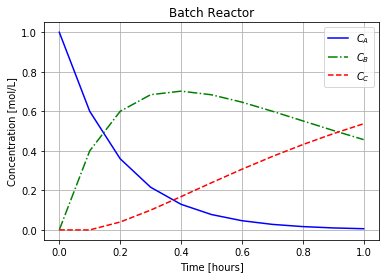

In [53]:
t_,C_ = forward_euler_system(A_rxn,c_rxn,c0,Delta_t,t_final/Delta_t)
plot_concentrations(t_,C_)

#### Backward Euler

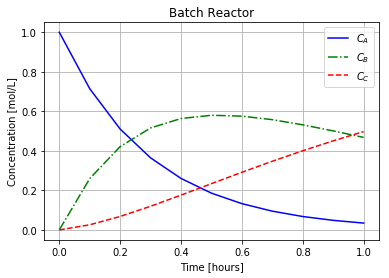

In [54]:
### BEGIN SOLUTION
t_,C_ = backward_euler_system(A_rxn,c_rxn,c0,Delta_t,t_final/Delta_t)
plot_concentrations(t_,C_)
### END SOLUTION

#### Crank-Nicolson

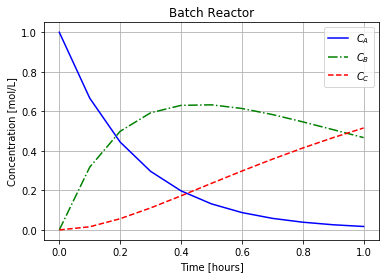

In [55]:
### BEGIN SOLUTION
t_,C_ = cn_system(A_rxn,c_rxn,c0,Delta_t,t_final/Delta_t)
plot_concentrations(t_,C_)
### END SOLUTION

#### Runge-Kutta

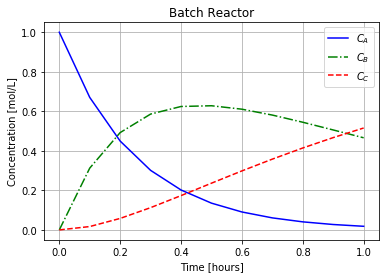

In [56]:
### BEGIN SOLUTION
t_,C_ = RK4_system(A_rxn,c_rxn,c0,Delta_t,t_final/Delta_t)
plot_concentrations(t_,C_)
### END SOLUTION

### 12j-iv. Numerically Integrate using Scipy